In [ ]:
import pandas as pd

df = pd.read_csv('us-vaccines.csv',error_bad_lines=False)

In [ ]:
df['Entity']

0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
6778    Wyoming
6779    Wyoming
6780    Wyoming
6781    Wyoming
6782    Wyoming
Name: Entity, Length: 6783, dtype: object

In [ ]:
NY = df[df.Entity == 'Virginia'].reset_index()

In [ ]:
NY

,index,Entity,Code,Day,daily_vaccinations
0,6263,Virginia,NaN,2021-01-13,27229
1,6264,Virginia,NaN,2021-01-14,13614
2,6265,Virginia,NaN,2021-01-15,17876
3,6266,Virginia,NaN,2021-01-16,18573
4,6267,Virginia,NaN,2021-01-17,18991
...,...,...,...,...,...
99,6362,Virginia,NaN,2021-04-22,88988
100,6363,Virginia,NaN,2021-04-23,85810
101,6364,Virginia,NaN,2021-04-24,86223
102,6365,Virginia,NaN,2021-04-25,85460


In [ ]:
NY = NY[['Day','daily_vaccinations']]

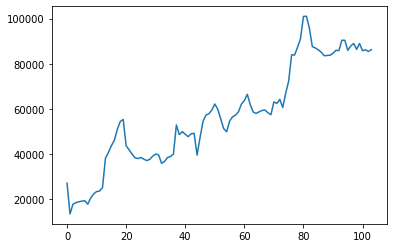

In [ ]:
import matplotlib.pyplot as plt
plt.plot(NY['daily_vaccinations'])

In [ ]:
!pip install fbprophet

In [ ]:

# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
NY

,Day,daily_vaccinations
0,2021-01-13,27229
1,2021-01-14,13614
2,2021-01-15,17876
3,2021-01-16,18573
4,2021-01-17,18991
...,...,...
99,2021-04-22,88988
100,2021-04-23,85810
101,2021-04-24,86223
102,2021-04-25,85460


### Model Testing

In [ ]:
from fbprophet import Prophet
df = NY
df = df.rename(columns={"Day": "ds", "daily_vaccinations": "y"})
df = df[['ds','y']]
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
# create test dataset, remove last 12 months
import math
train_size = math.floor(0.8*(len(df)))
test_size = len(df) - train_size
print("Train Size: {}, Test Size: {} ".format(train_size, test_size))
train = df.drop(df.index[-test_size:])
print(train.tail())

Train Size: 83, Test Size: 21 
           ds       y
78 2021-04-01   87342
79 2021-04-02   91083
80 2021-04-03  100970
81 2021-04-04  101058
82 2021-04-05   95899


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.


MAE: 3484.063
MSE: 20545087.214


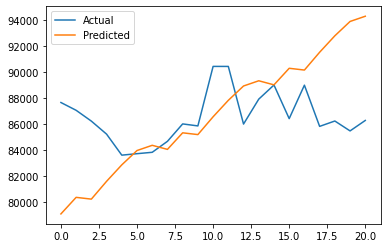

In [ ]:
model = Prophet(weekly_seasonality=True, seasonality_mode='additive', changepoint_range=0)
model.fit(train)
future = df['ds'][-test_size:].reset_index()
future = future.drop(columns='index')
forecast = model.predict(future)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = df['y'][-test_size:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)

# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mape_score = (abs(y_true-y_pred)/y_true)
mape_mean = mape_score.mean()
print("MAPE: ", mape_mean)
from sklearn.metrics import r2_score
print("R2: ",r2_score(y_true, y_pred))
from sklearn.metrics import mean_squared_error
import math
print("RMSE",math.sqrt(mean_squared_error(y_true, y_pred)))

MAPE:  0.040205850394176346
R2:  -4.507901327901273
RMSE 4532.668884264114


# Forecast

In [ ]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = list()
for j in range(4,12):
  for i in range(1, 30):
    date = '2021-{:02d}-{:02d}'.format(j,i)
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [ ]:
forecast = model.predict(future)

In [ ]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 2021-04-01  111.642006 -103.422561  323.679222
1 2021-04-02  111.251765 -108.388800  331.464656
2 2021-04-03  112.065996 -110.072967  332.513910
3 2021-04-04  112.317018 -102.891659  333.776273
4 2021-04-05  102.518644 -109.403684  317.191420


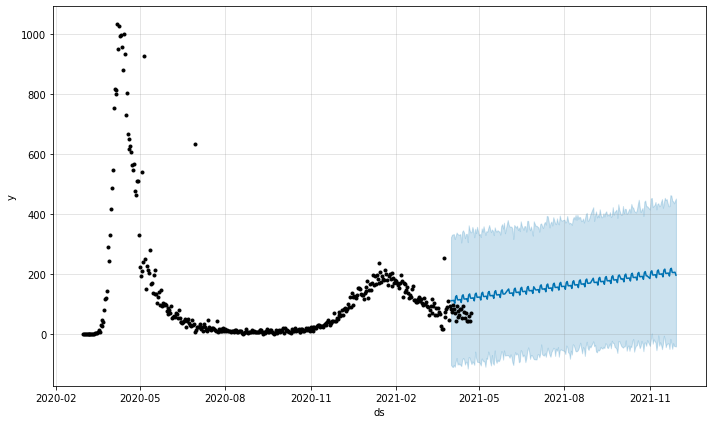

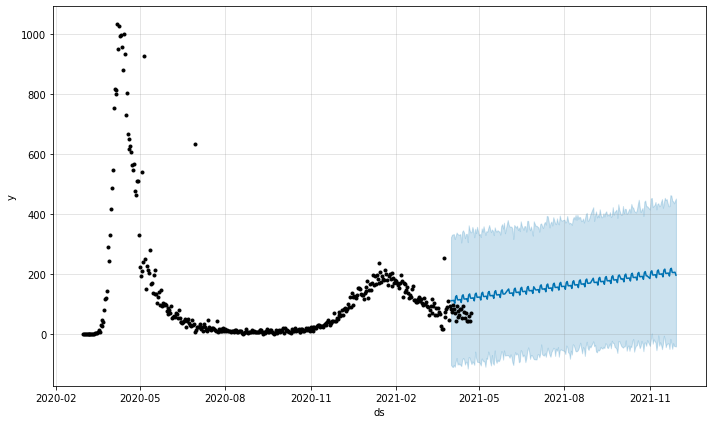

In [ ]:
model.plot(forecast)